In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme("notebook")

In [115]:
df=pd.read_csv("cleaned_df")

In [116]:
df.head()

datetime  season  year  month  hour  holiday  weekday  workingday  \
0  2011-01-01       1     0      1     0        0        6           0   
1  2011-01-01       1     0      1     1        0        6           0   
2  2011-01-01       1     0      1     2        0        6           0   
3  2011-01-01       1     0      1     3        0        6           0   
4  2011-01-01       1     0      1     4        0        6           0   

   weather  temp   atemp  humidity  windspeed  casual  registered  count  \
0        1  0.24  0.2879      0.81        0.0       3          13     16   
1        1  0.22  0.2727      0.80        0.0       8          32     40   
2        1  0.22  0.2727      0.80        0.0       5          27     32   
3        1  0.24  0.2879      0.75        0.0       3          10     13   
4        1  0.24  0.2879      0.75        0.0       0           1      1   

   rush_hour  
0       True  
1       True  
2       True  
3       True  
4       True

In [117]:
df['season'] = df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
}).astype('O')

df['weekday'] = df['weekday'].map({
    0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday',
    4: 'Wednesday', 5: 'Thursday', 6: 'Friday'
}).astype('O')
df['weather'] = df['weather'].map({
    1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'
}).astype('O')
df['hour'] = df['hour'].astype('O')
df['month'] = df['month'].astype('O')
df['year'] = df['year'].map({0:"2011",1:"2012"})
df['holiday'] = df['holiday'].astype("bool")
df['workingday'] = df['workingday'].astype("bool")
df['datetime'] = pd.to_datetime(df['datetime'])

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16259 entries, 0 to 16258
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    16259 non-null  datetime64[ns]
 1   season      16259 non-null  object        
 2   year        16259 non-null  object        
 3   month       16259 non-null  object        
 4   hour        16259 non-null  object        
 5   holiday     16259 non-null  bool          
 6   weekday     16259 non-null  object        
 7   workingday  16259 non-null  bool          
 8   weather     16259 non-null  object        
 9   temp        16259 non-null  float64       
 10  atemp       16259 non-null  float64       
 11  humidity    16259 non-null  float64       
 12  windspeed   16259 non-null  float64       
 13  casual      16259 non-null  int64         
 14  registered  16259 non-null  int64         
 15  count       16259 non-null  int64         
 16  rush_hour   16259 non-

In [119]:
cat_cols=df.select_dtypes(include="O").columns
num_cols=df.select_dtypes(include=["int64","float64"]).columns

In [120]:
cat_cols

Index(['season', 'year', 'month', 'hour', 'weekday', 'weather'], dtype='object')

In [121]:
plt.rcParams['font.family'] = 'Segoe UI Emoji'

In [122]:
def uni_num(col):
    print(f"\n🔍 Univariate Analysis for: {col}\n")
    print(df[col].describe())  

    plt.figure(figsize=(12, 5))  

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'📊 Distribution of "{col}"', fontsize=14)
    plt.xlabel(f'{col}', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f'🧰 Outliers & Spread in "{col}"', fontsize=14)
    plt.xlabel(f'{col}', fontsize=12)
    plt.grid(True)

    plt.suptitle(f'✨ Visual Summary for "{col}" ✨', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leaves space for suptitle
    plt.show()



🔍 Univariate Analysis for: temp

count    16259.000000
mean         0.487943
std          0.191709
min          0.020000
25%          0.330000
50%          0.480000
75%          0.640000
max          1.000000
Name: temp, dtype: float64


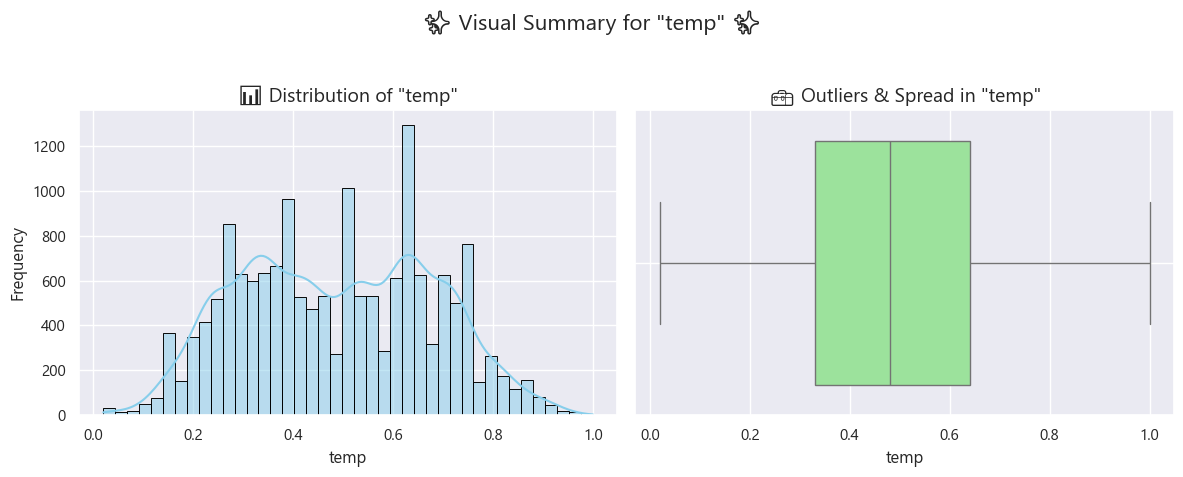


🔍 Univariate Analysis for: atemp

count    16259.000000
mean         0.467895
std          0.171253
min          0.000000
25%          0.318200
50%          0.469700
75%          0.606100
max          1.000000
Name: atemp, dtype: float64


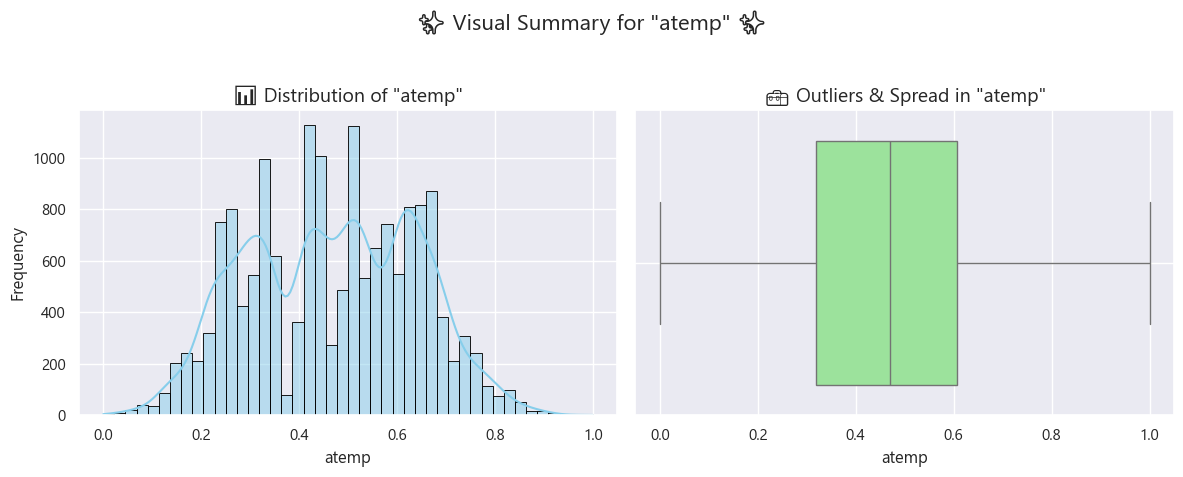


🔍 Univariate Analysis for: humidity

count    16259.000000
mean         0.635733
std          0.191340
min          0.000000
25%          0.490000
50%          0.640000
75%          0.790000
max          1.000000
Name: humidity, dtype: float64


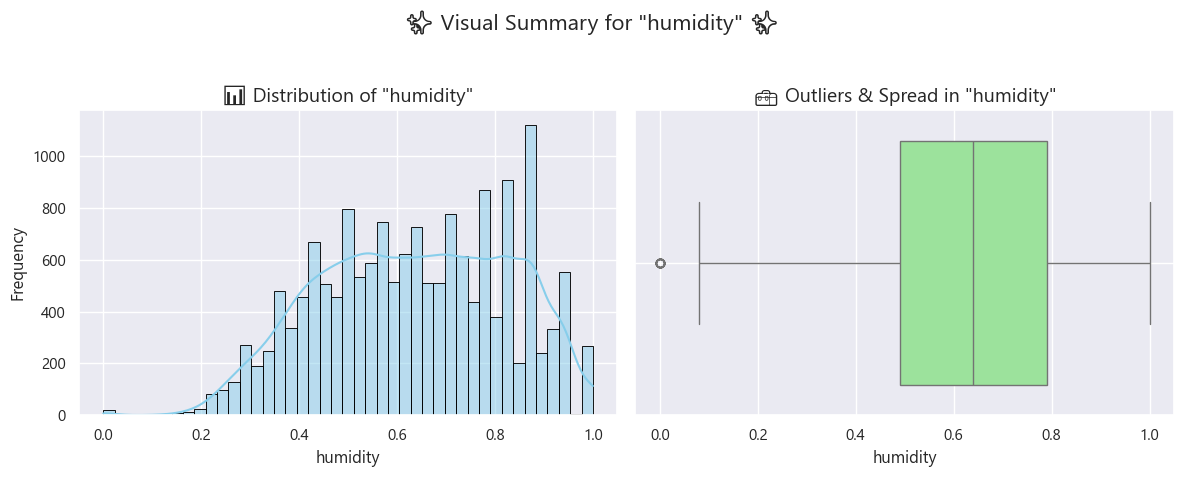


🔍 Univariate Analysis for: windspeed

count    16259.000000
mean         0.186110
std          0.117722
min          0.000000
25%          0.104500
50%          0.164200
75%          0.253700
max          0.552200
Name: windspeed, dtype: float64


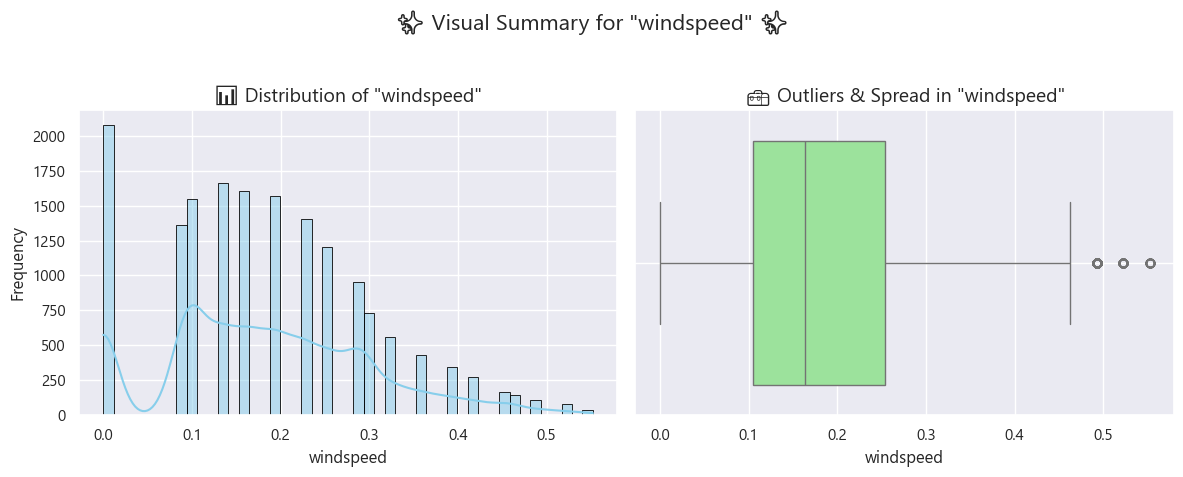


🔍 Univariate Analysis for: casual

count    16259.000000
mean        28.268590
std         34.120314
min          0.000000
25%          3.000000
50%         14.000000
75%         42.000000
max        171.000000
Name: casual, dtype: float64


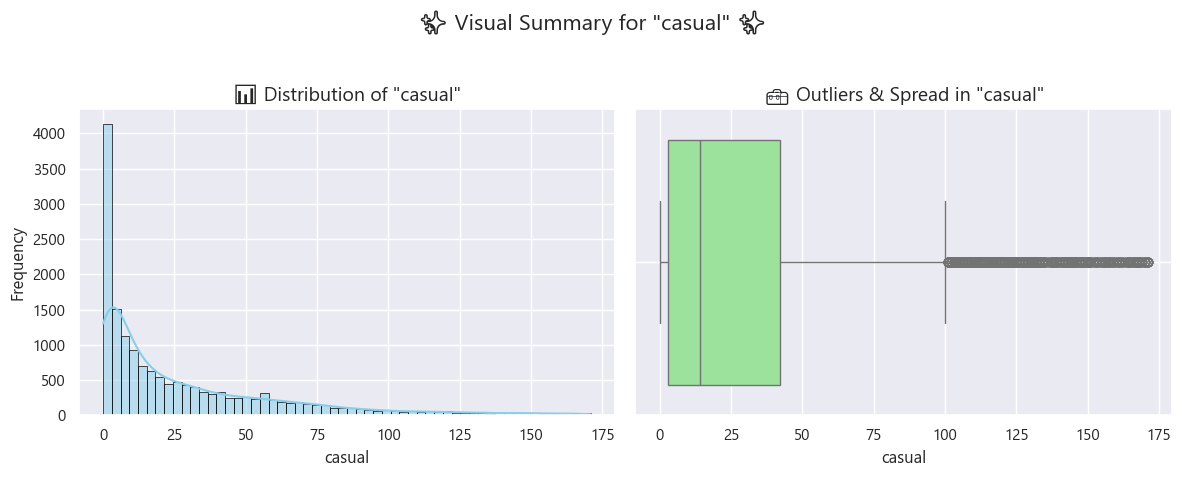


🔍 Univariate Analysis for: registered

count    16259.000000
mean       134.016606
std        123.087051
min          0.000000
25%         30.000000
50%        106.000000
75%        198.000000
max        568.000000
Name: registered, dtype: float64


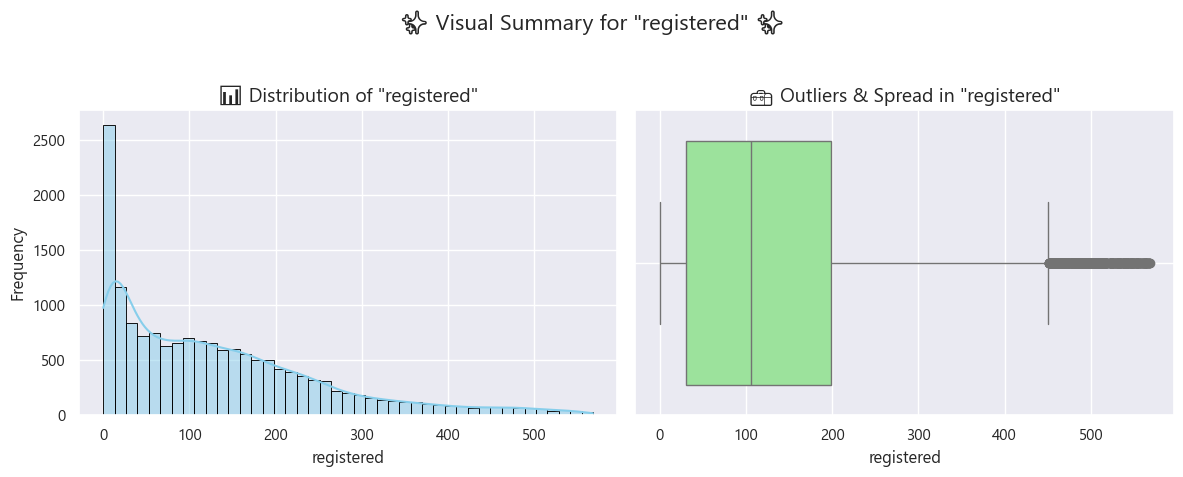


🔍 Univariate Analysis for: count

count    16259.000000
mean       162.285196
std        144.879833
min          1.000000
25%         35.000000
50%        128.000000
75%        249.000000
max        686.000000
Name: count, dtype: float64


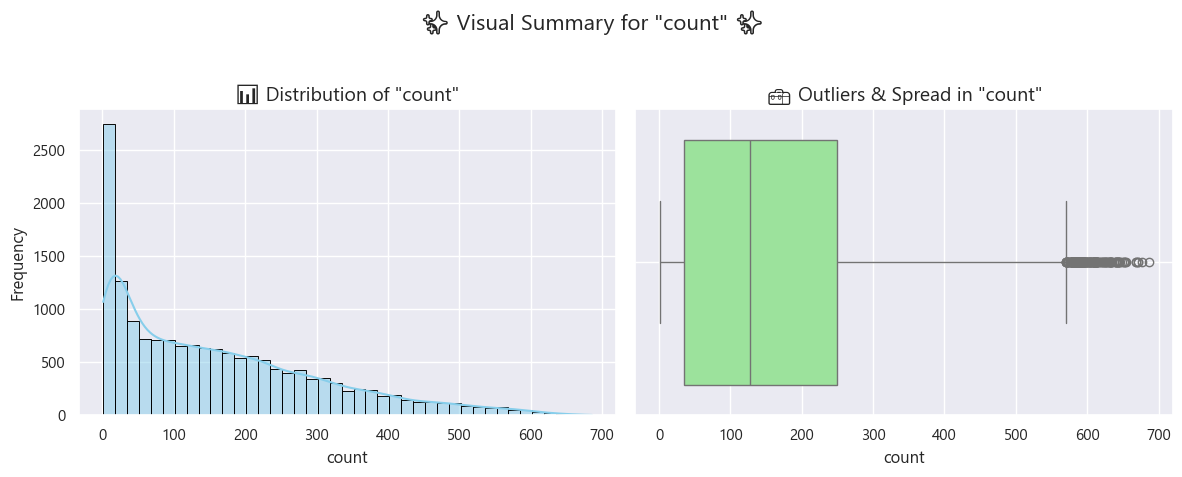

In [123]:
for col in num_cols :
    uni_num(col)

In [124]:
def uni_cat(col):
    print(f"\n🔎 Univariate Analysis for: {col}\n")
    print(df[col].describe())  

    data = df[col].value_counts().reset_index()
    data.columns = [col, 'count']

    plt.figure(figsize=(9, 5))
    sns.barplot(data=data, x=col, y='count', hue=col, palette="Set2", dodge=False, legend=False)
    plt.title(f'📋 Frequency of Categories in "{col}"', fontsize=14)
    plt.xlabel(f'{col} Categories', fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.suptitle(f'🔍 Categorical Overview: {col} 🧾', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


🔎 Univariate Analysis for: season

count      16259
unique         4
top       Spring
freq        4136
Name: season, dtype: object


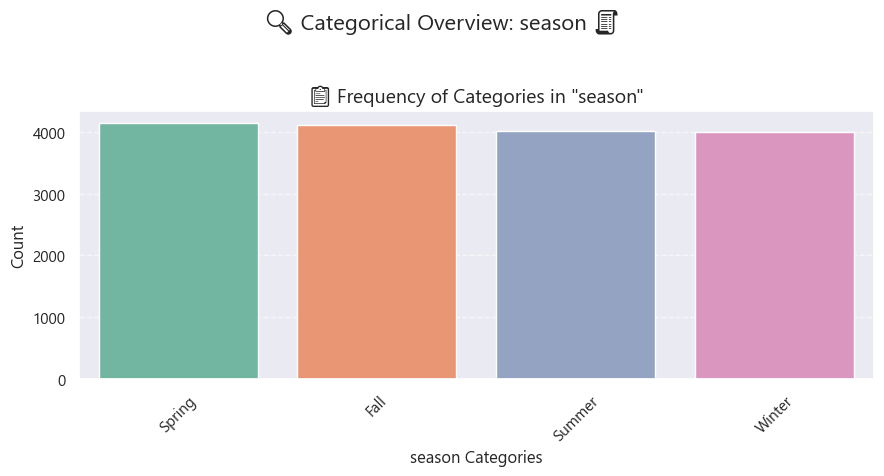


🔎 Univariate Analysis for: year

count     16259
unique        2
top        2011
freq       8459
Name: year, dtype: object


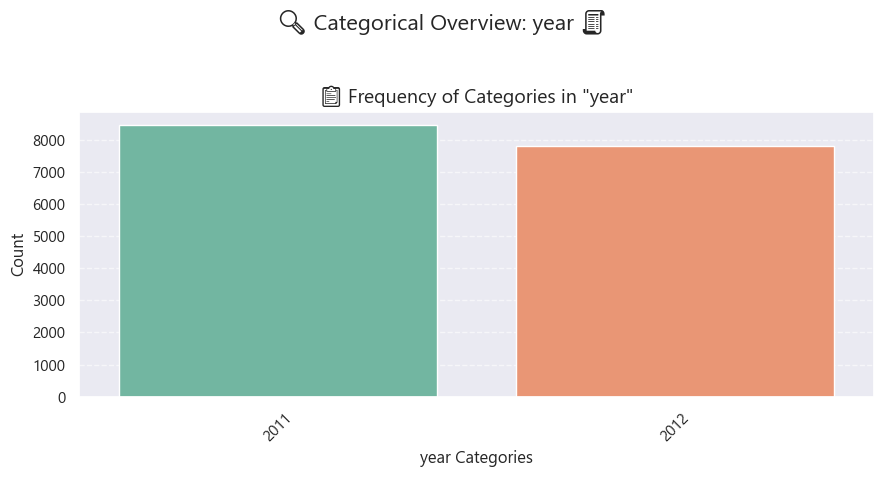


🔎 Univariate Analysis for: month

count     16259
unique       12
top          12
freq       1449
Name: month, dtype: int64


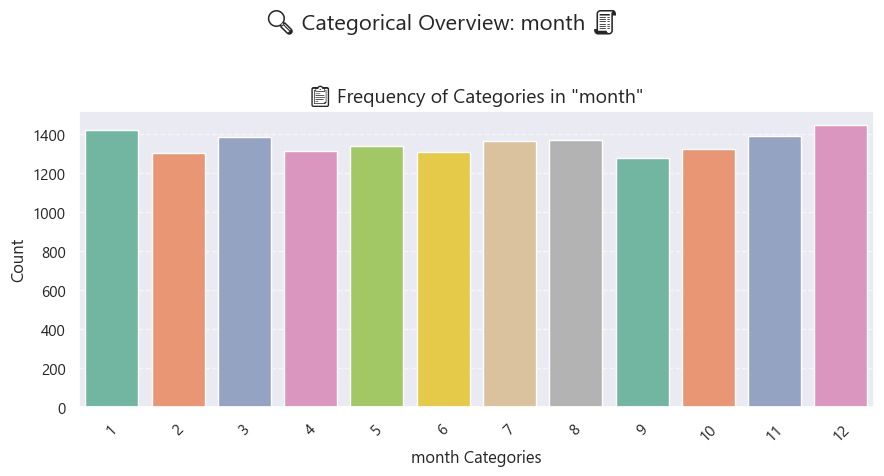


🔎 Univariate Analysis for: hour

count     16259
unique       24
top           7
freq        726
Name: hour, dtype: int64


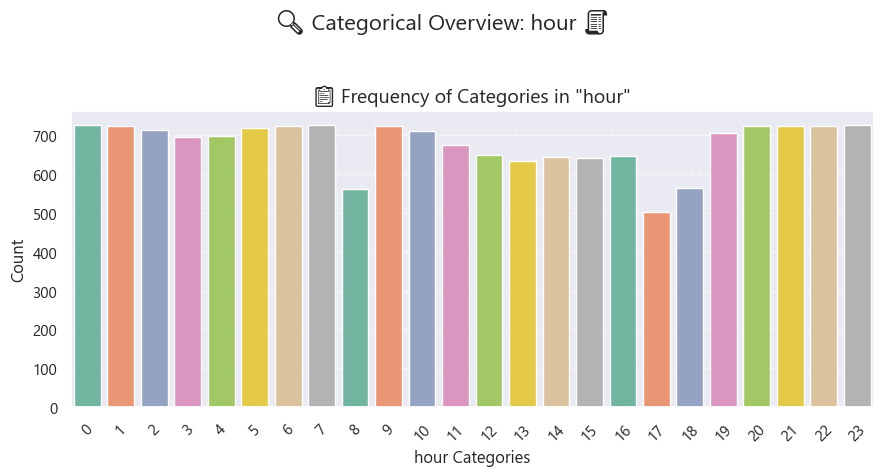


🔎 Univariate Analysis for: weekday

count        16259
unique           7
top       Thursday
freq          2391
Name: weekday, dtype: object


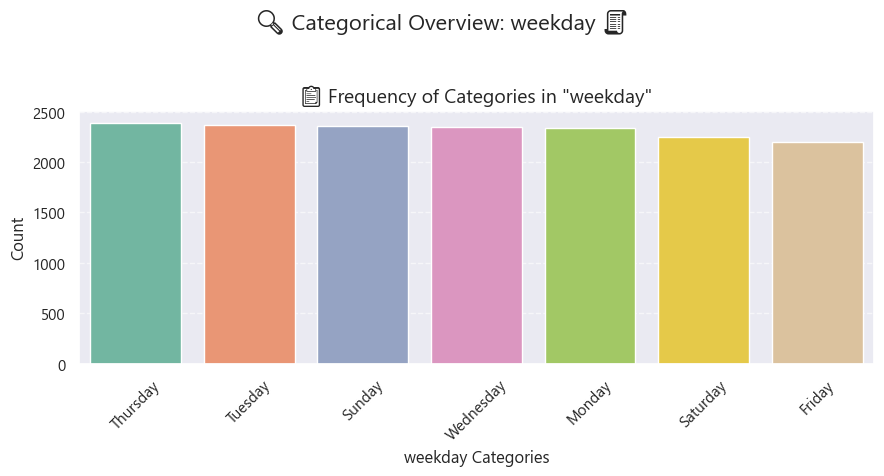


🔎 Univariate Analysis for: weather

count     16259
unique        4
top       Clear
freq      10550
Name: weather, dtype: object


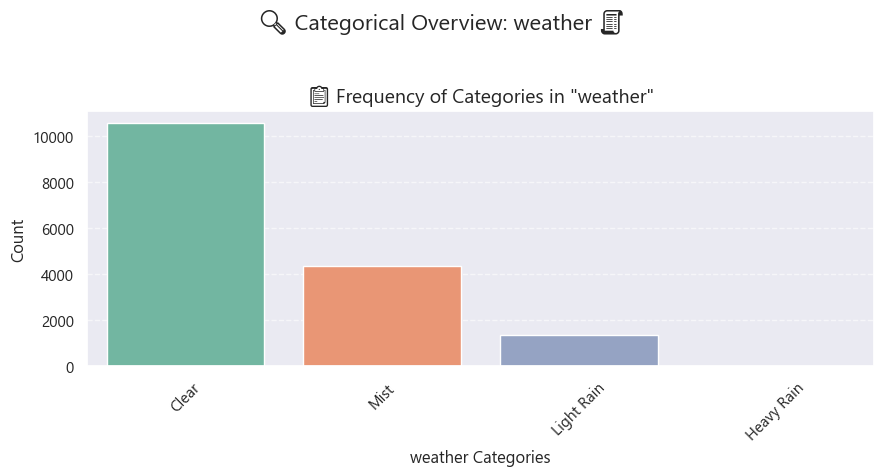

In [125]:
for col in cat_cols:
    uni_cat(col)


In [147]:
def num_vs_num(col1, target="count"):
    plt.figure(figsize=(8, 5))
    
    sns.regplot(data=df, x=col1, y=target, scatter_kws={'alpha': 0.6, 'color': 'dodgerblue'}, 
                line_kws={'color': 'red', 'lw': 2})
    
    plt.title(f'📈 Regression Plot: {col1} vs {target}', fontsize=14)
    plt.xlabel(col1, fontsize=12)
    plt.ylabel(target, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

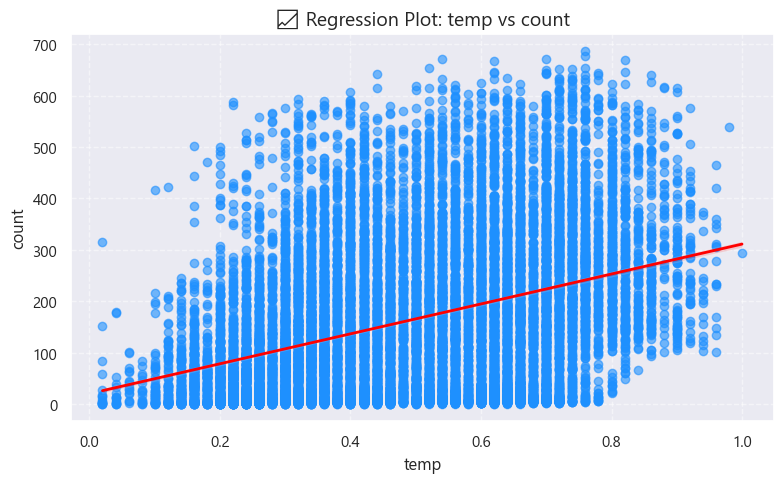

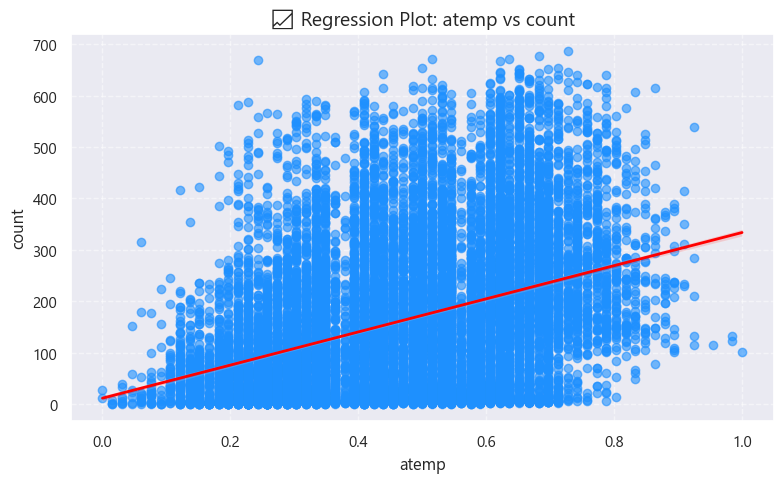

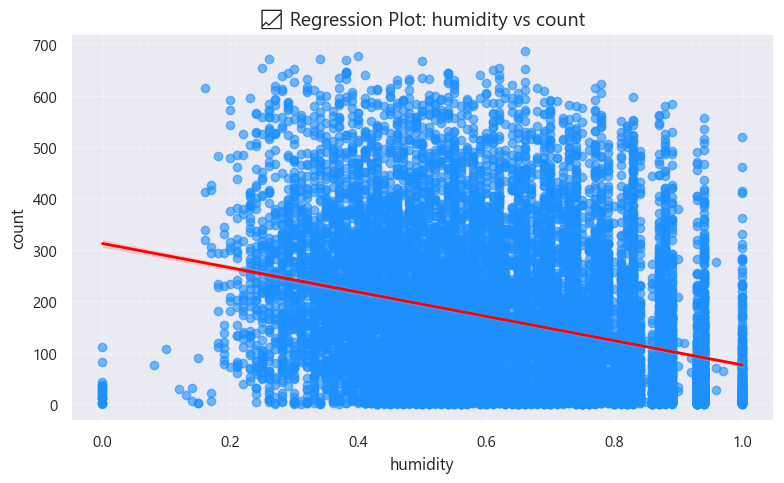

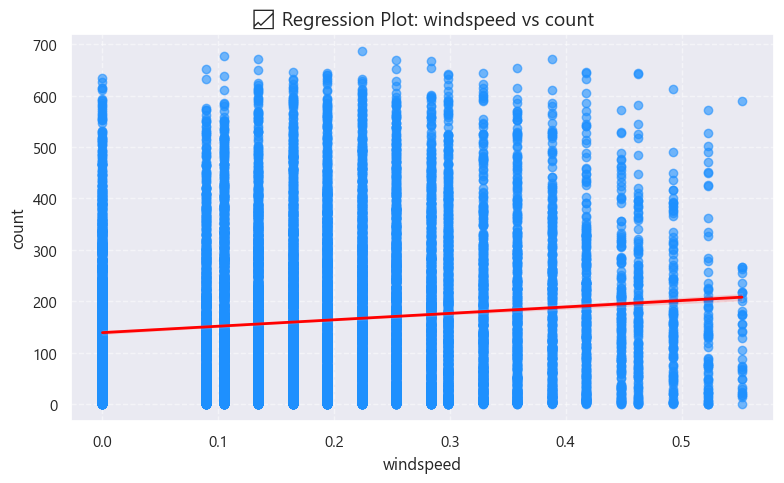

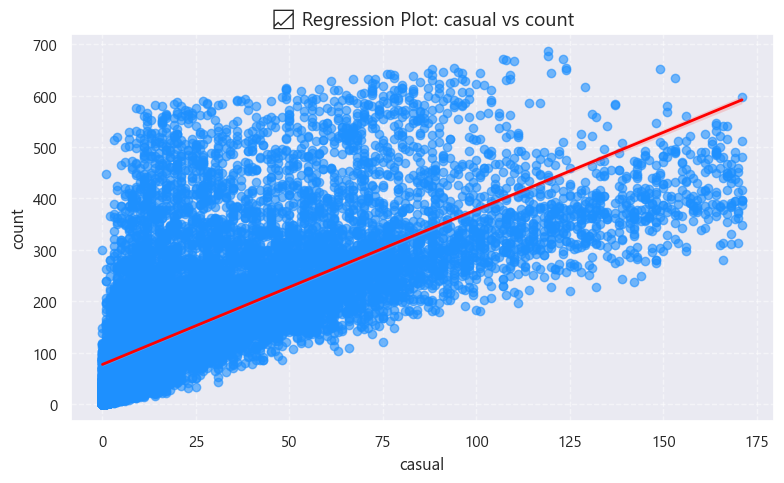

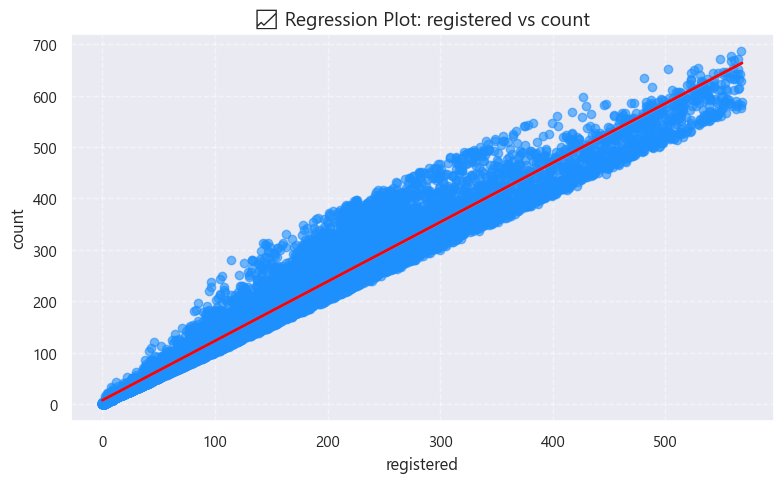

In [148]:
for col in num_cols:
    if col != "count":
        num_vs_num(col)

In [ ]:

def cat_vs_num(col, target="count"):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.barplot(data=df, x=col, y=target, hue=col, palette='pastel', dodge=False, legend=False, edgecolor='black')
    plt.title(f'📊 Avg {target} by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel(f'Average {target}', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col, y=target, hue=col, palette='Set2', dodge=False, legend=False)
    plt.title(f'🧰 Spread of {target} by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel(target, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


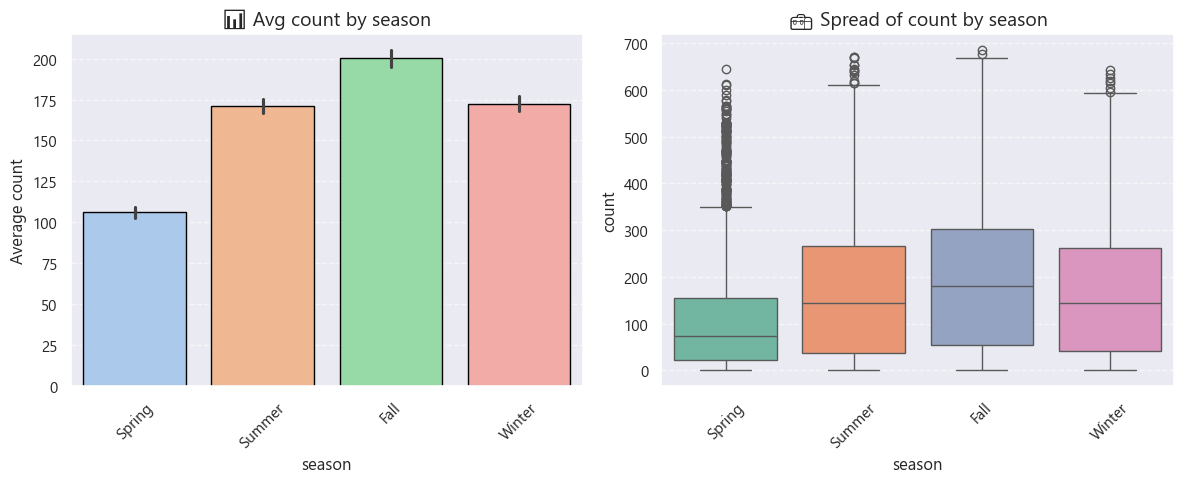

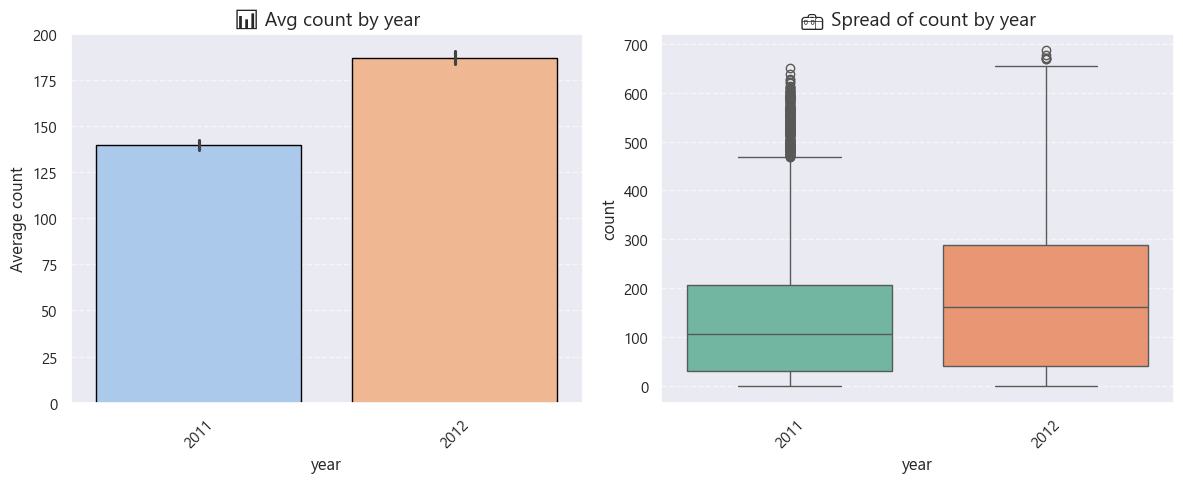

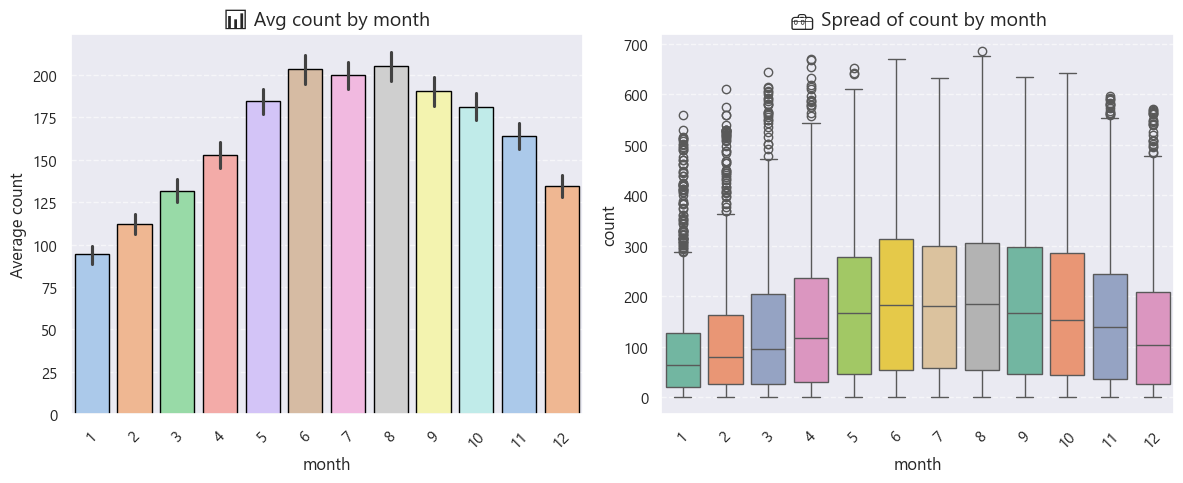

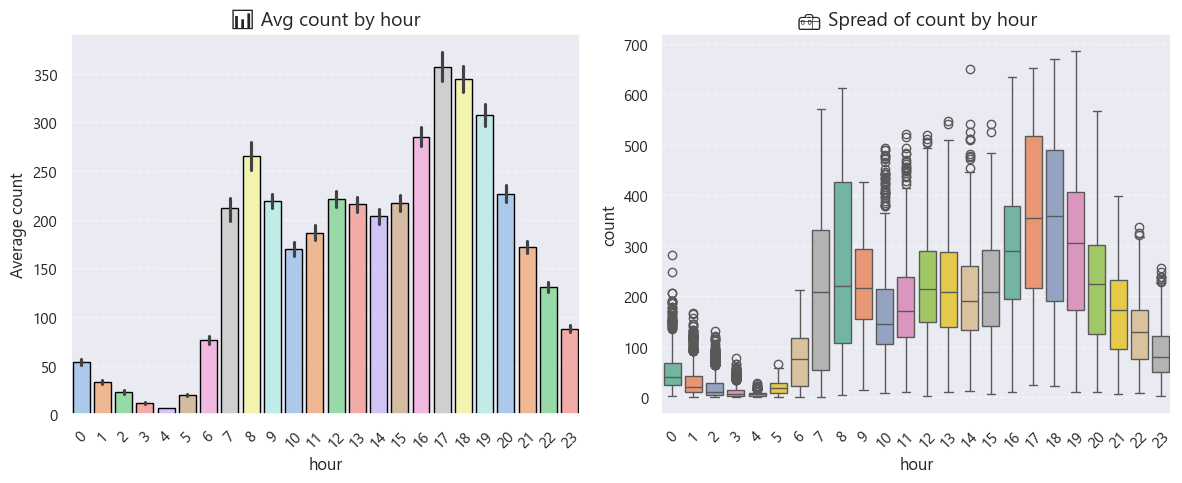

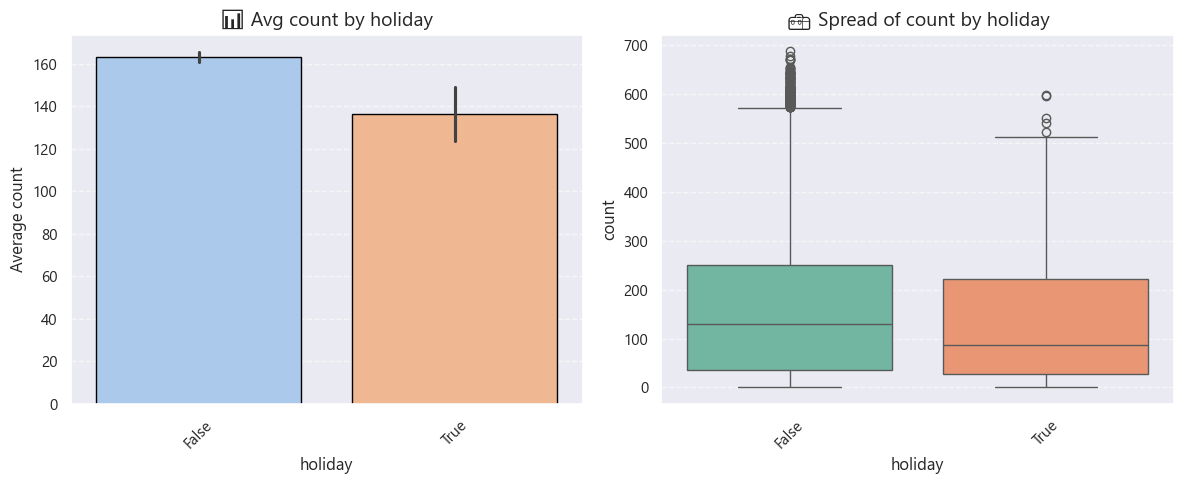

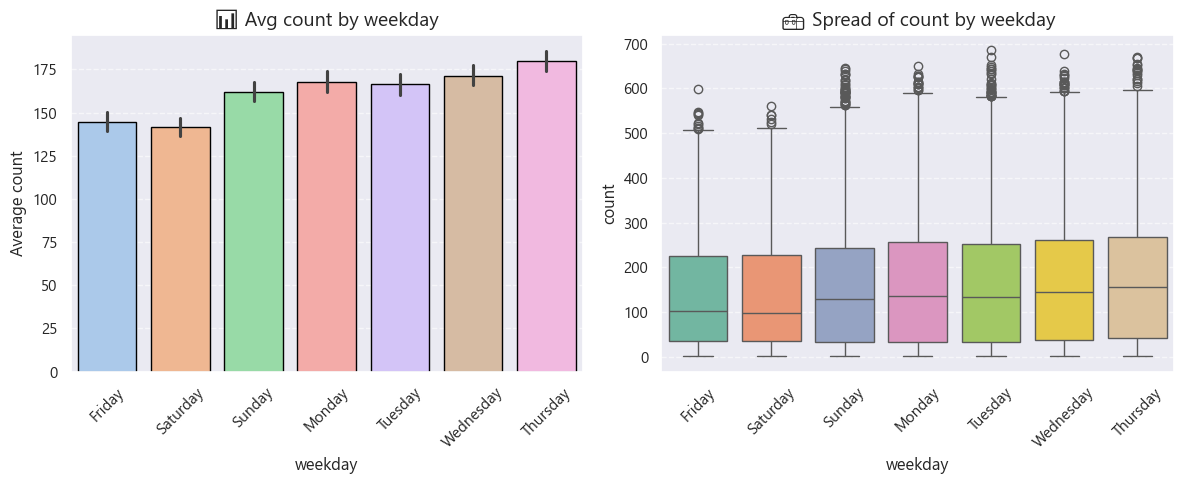

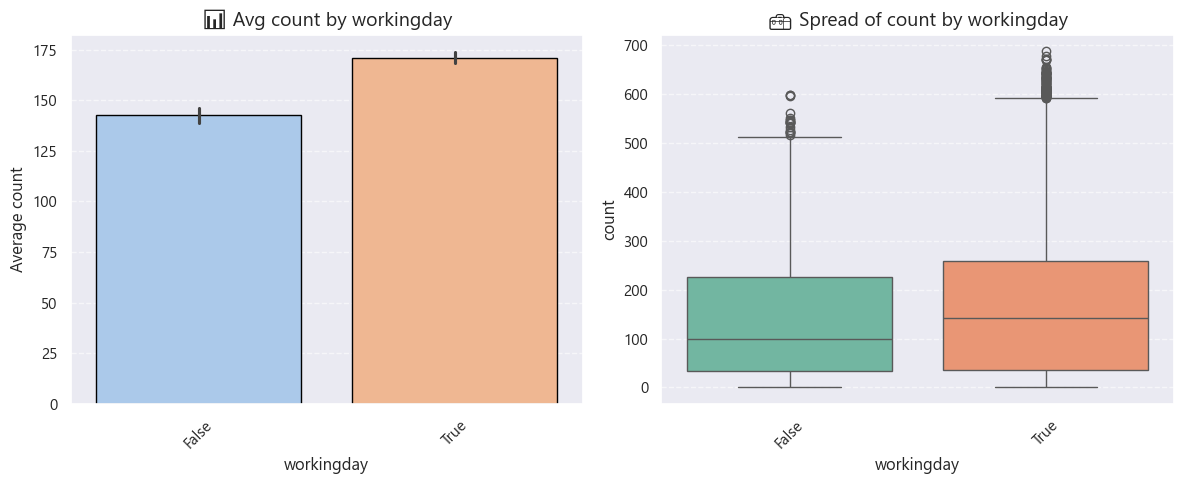

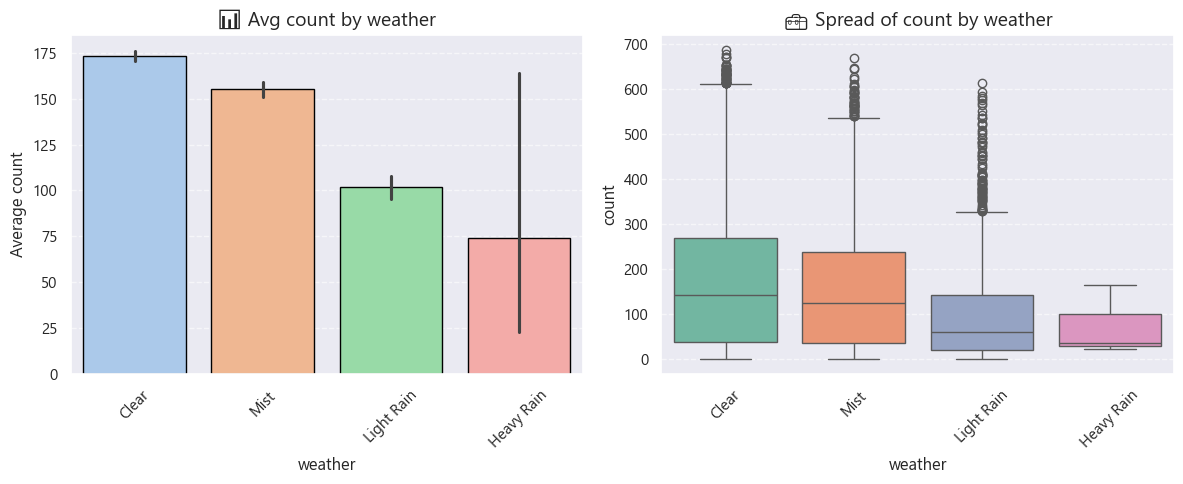

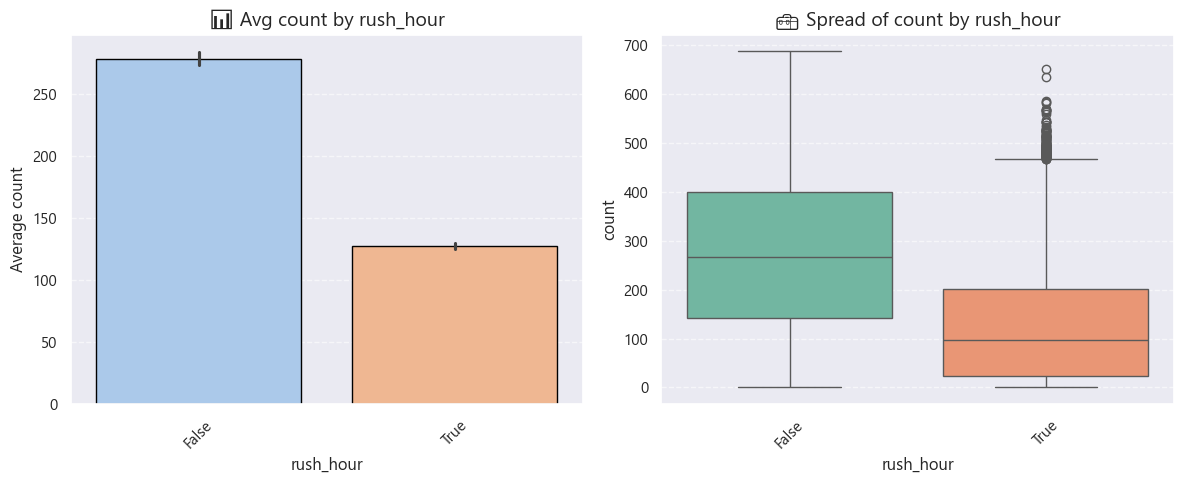

In [129]:
bc_cols=df.select_dtypes(include=["bool","object"]).columns
for col in bc_cols:
    cat_vs_num(col)

In [130]:
binary_cols=df.select_dtypes(include="bool")

In [140]:
def binary_vs_cat(bi, cat):
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x=cat, y=bi, hue=cat, palette='pastel', dodge=False, legend=False, edgecolor='black')
    plt.title(f'📊 Proportion of {bi} by {cat}', fontsize=14)
    plt.xlabel(cat, fontsize=12)
    plt.ylabel(f'Average {bi}s', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

📈 Analyzing binary column 'holiday' vs categorical column 'season'


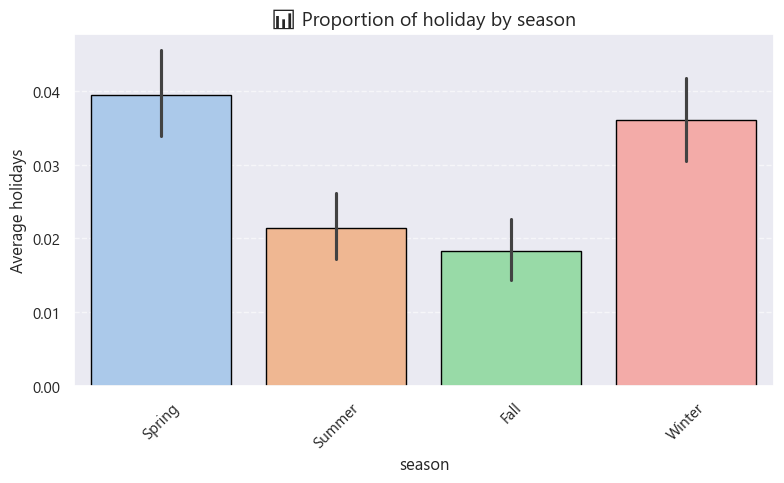

📈 Analyzing binary column 'holiday' vs categorical column 'year'


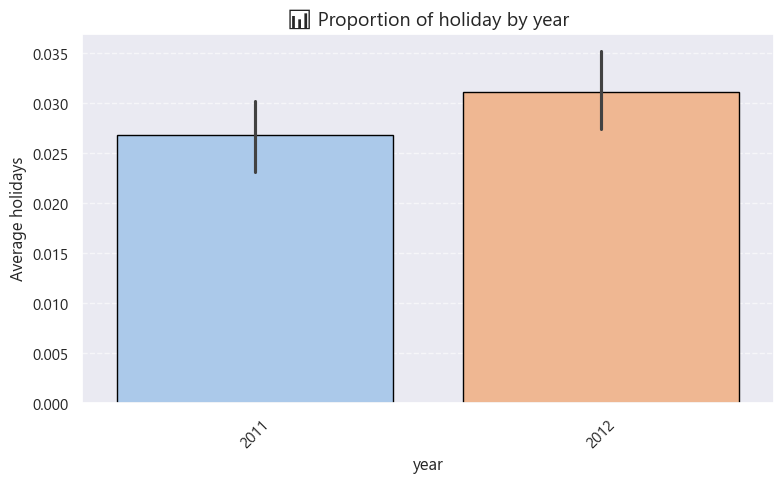

📈 Analyzing binary column 'holiday' vs categorical column 'month'


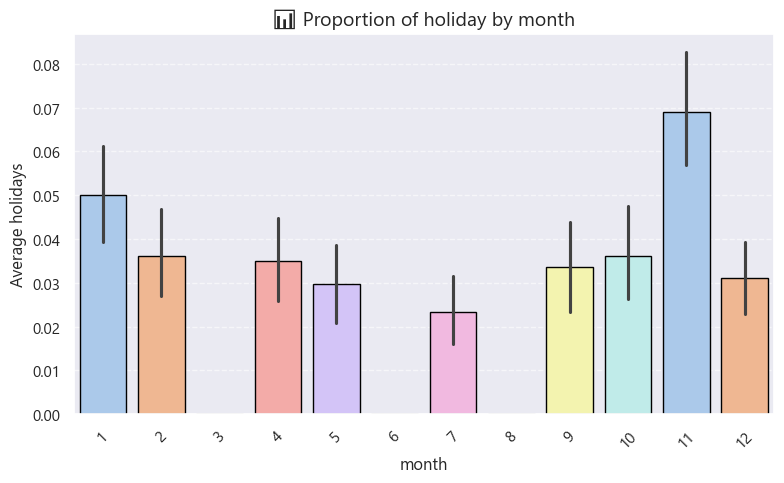

📈 Analyzing binary column 'holiday' vs categorical column 'hour'


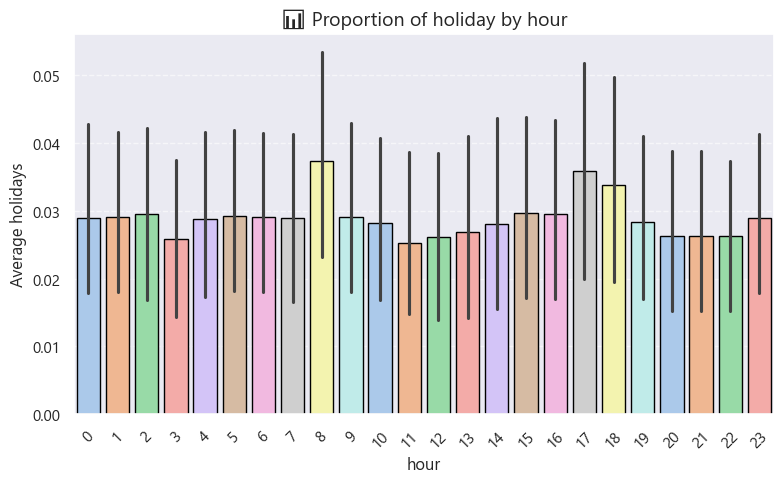

📈 Analyzing binary column 'holiday' vs categorical column 'weekday'


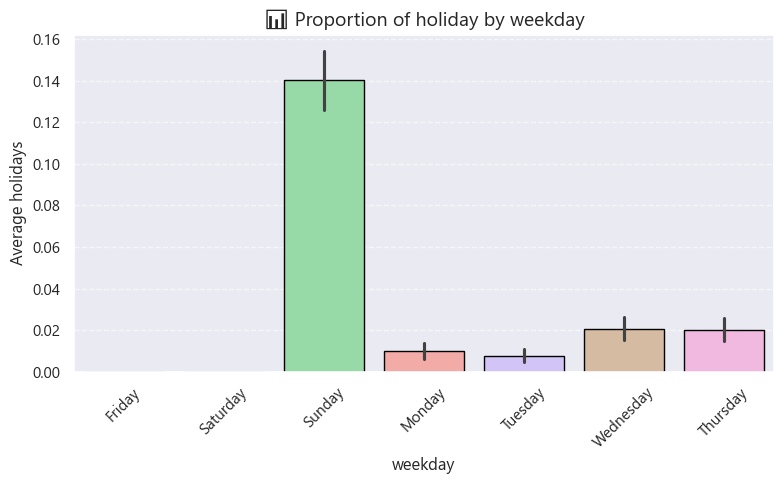

📈 Analyzing binary column 'holiday' vs categorical column 'weather'


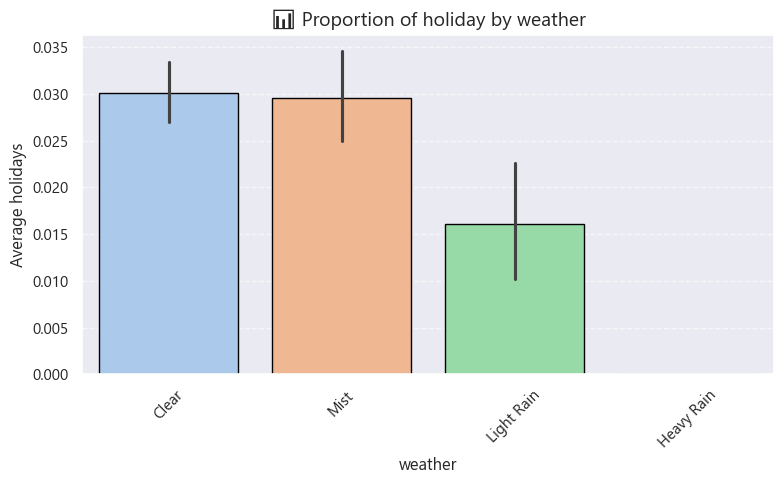

📈 Analyzing binary column 'workingday' vs categorical column 'season'


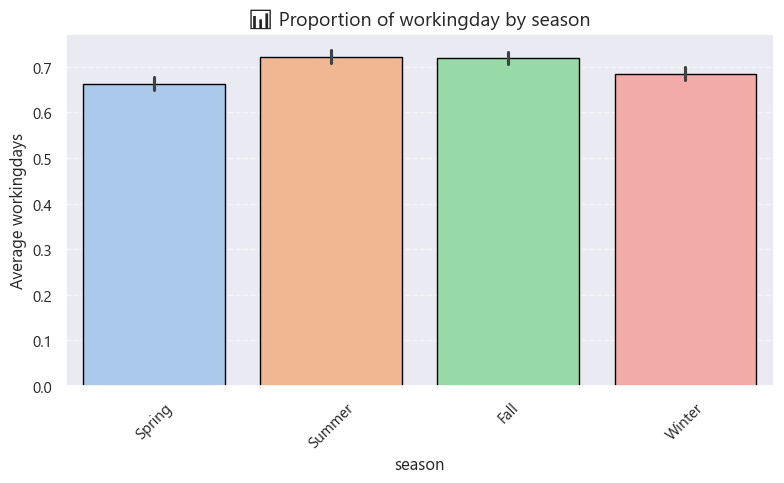

📈 Analyzing binary column 'workingday' vs categorical column 'year'


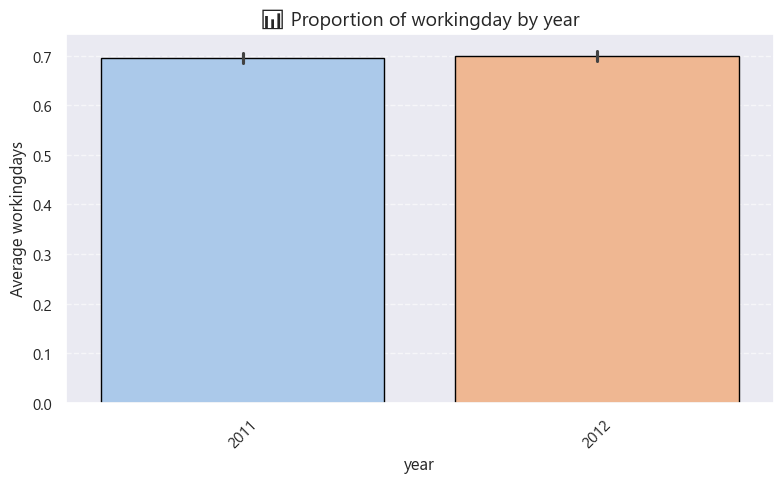

📈 Analyzing binary column 'workingday' vs categorical column 'month'


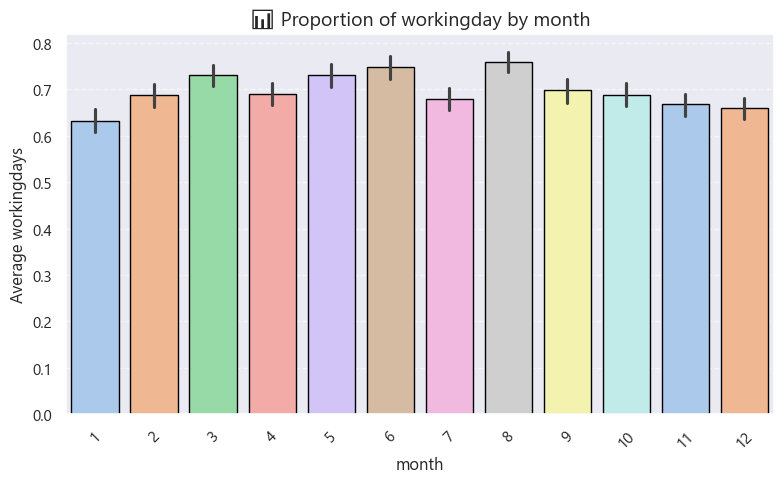

📈 Analyzing binary column 'workingday' vs categorical column 'hour'


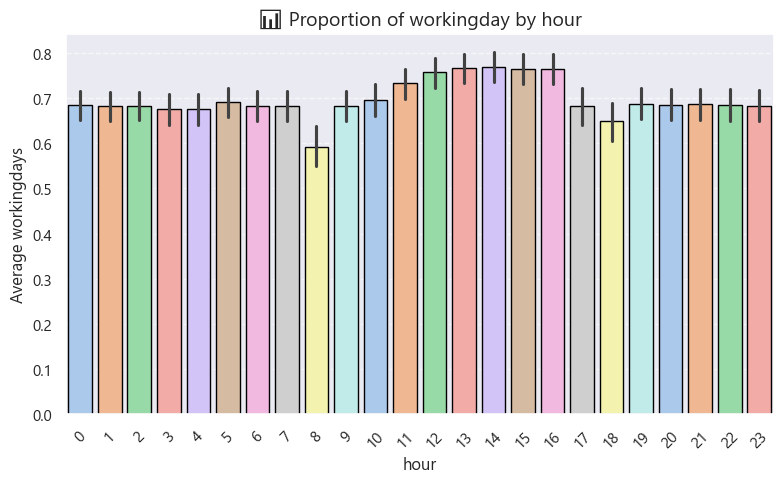

📈 Analyzing binary column 'workingday' vs categorical column 'weekday'


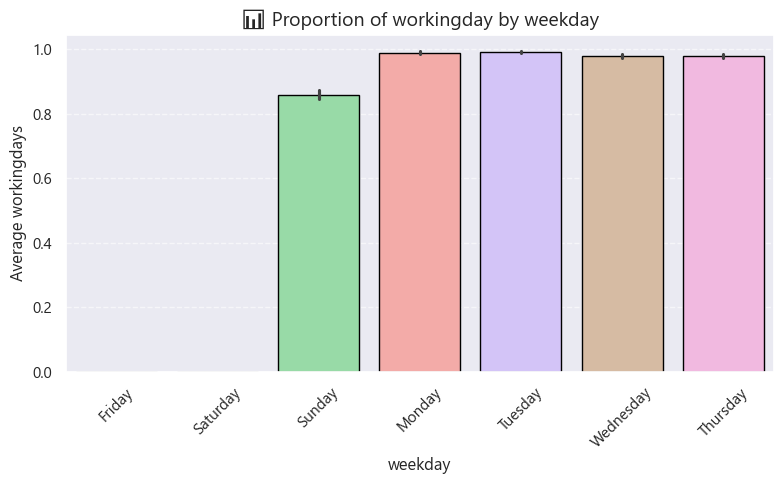

📈 Analyzing binary column 'workingday' vs categorical column 'weather'


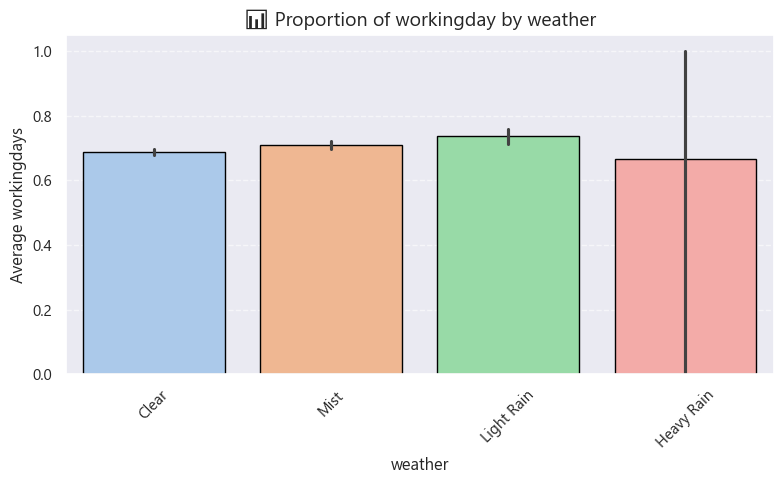

📈 Analyzing binary column 'rush_hour' vs categorical column 'season'


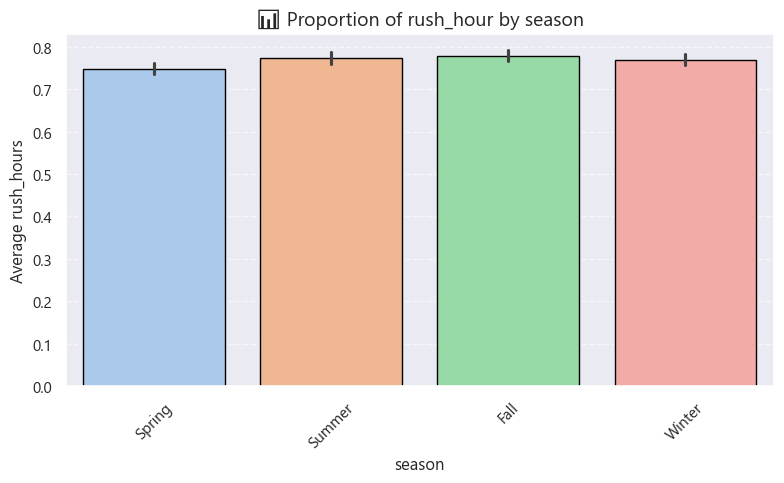

📈 Analyzing binary column 'rush_hour' vs categorical column 'year'


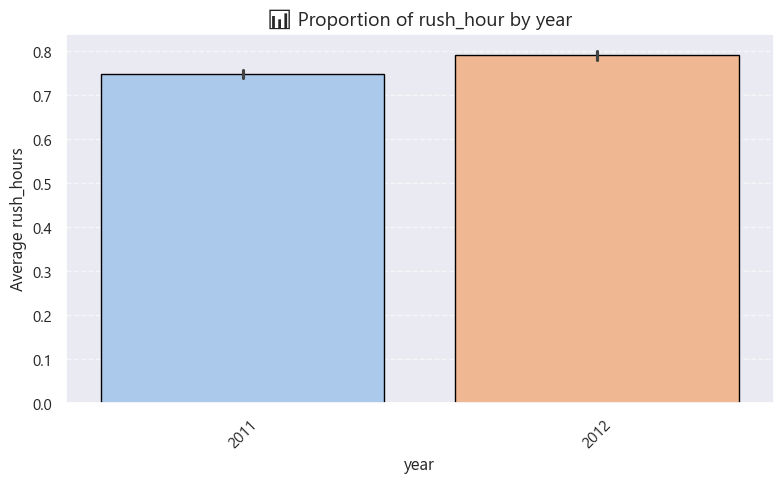

📈 Analyzing binary column 'rush_hour' vs categorical column 'month'


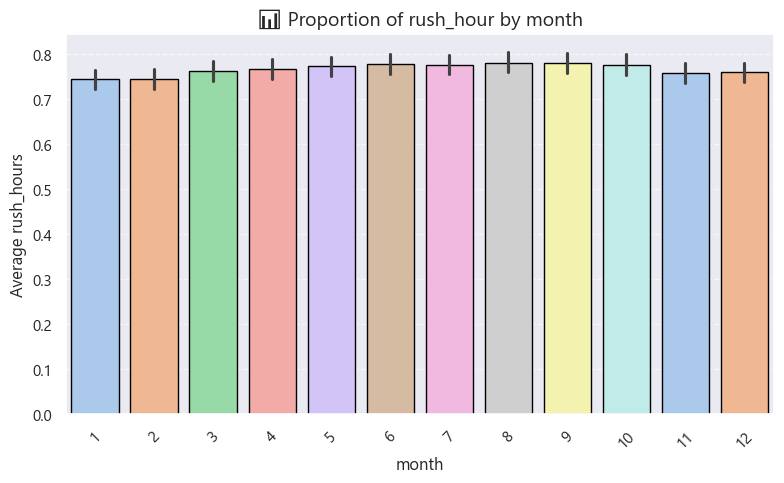

📈 Analyzing binary column 'rush_hour' vs categorical column 'hour'


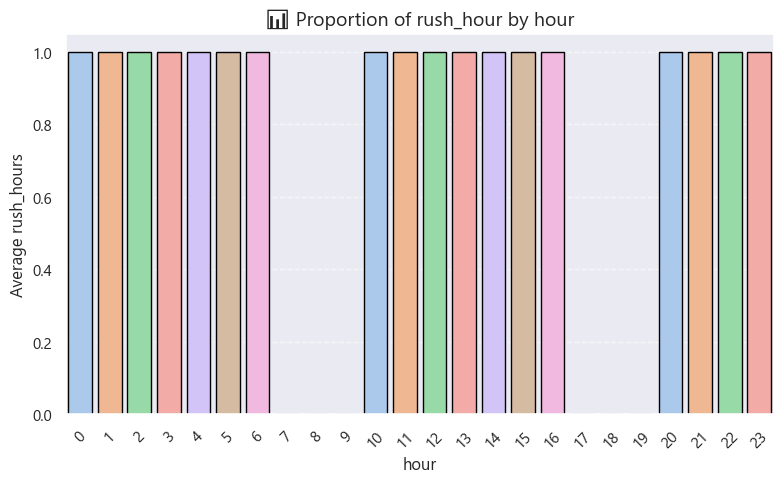

📈 Analyzing binary column 'rush_hour' vs categorical column 'weekday'


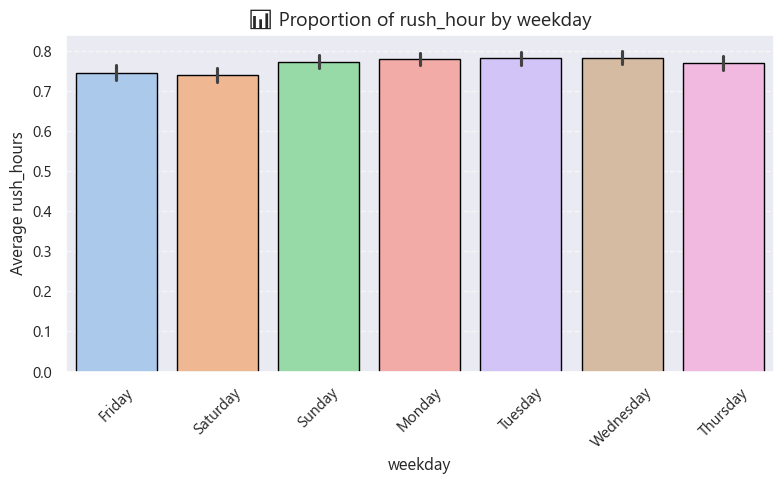

📈 Analyzing binary column 'rush_hour' vs categorical column 'weather'


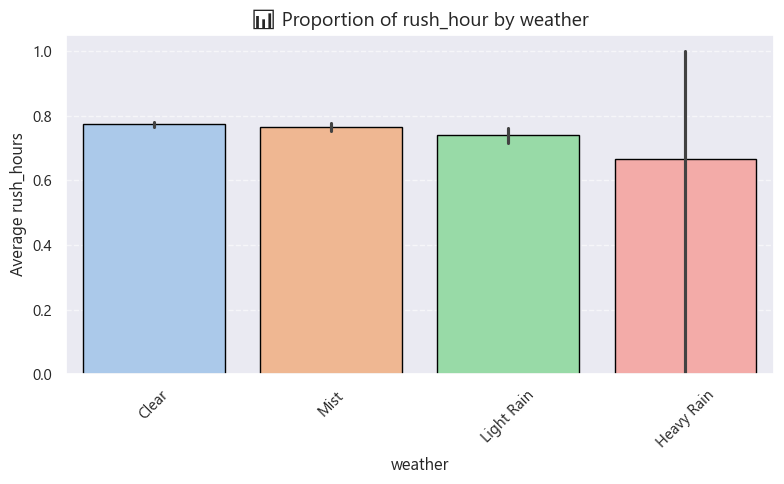

In [142]:
for bi in binary_cols:
    for cat in cat_cols:
        print(f"📈 Analyzing binary column '{bi}' vs categorical column '{cat}'")
        binary_vs_cat(bi, cat)

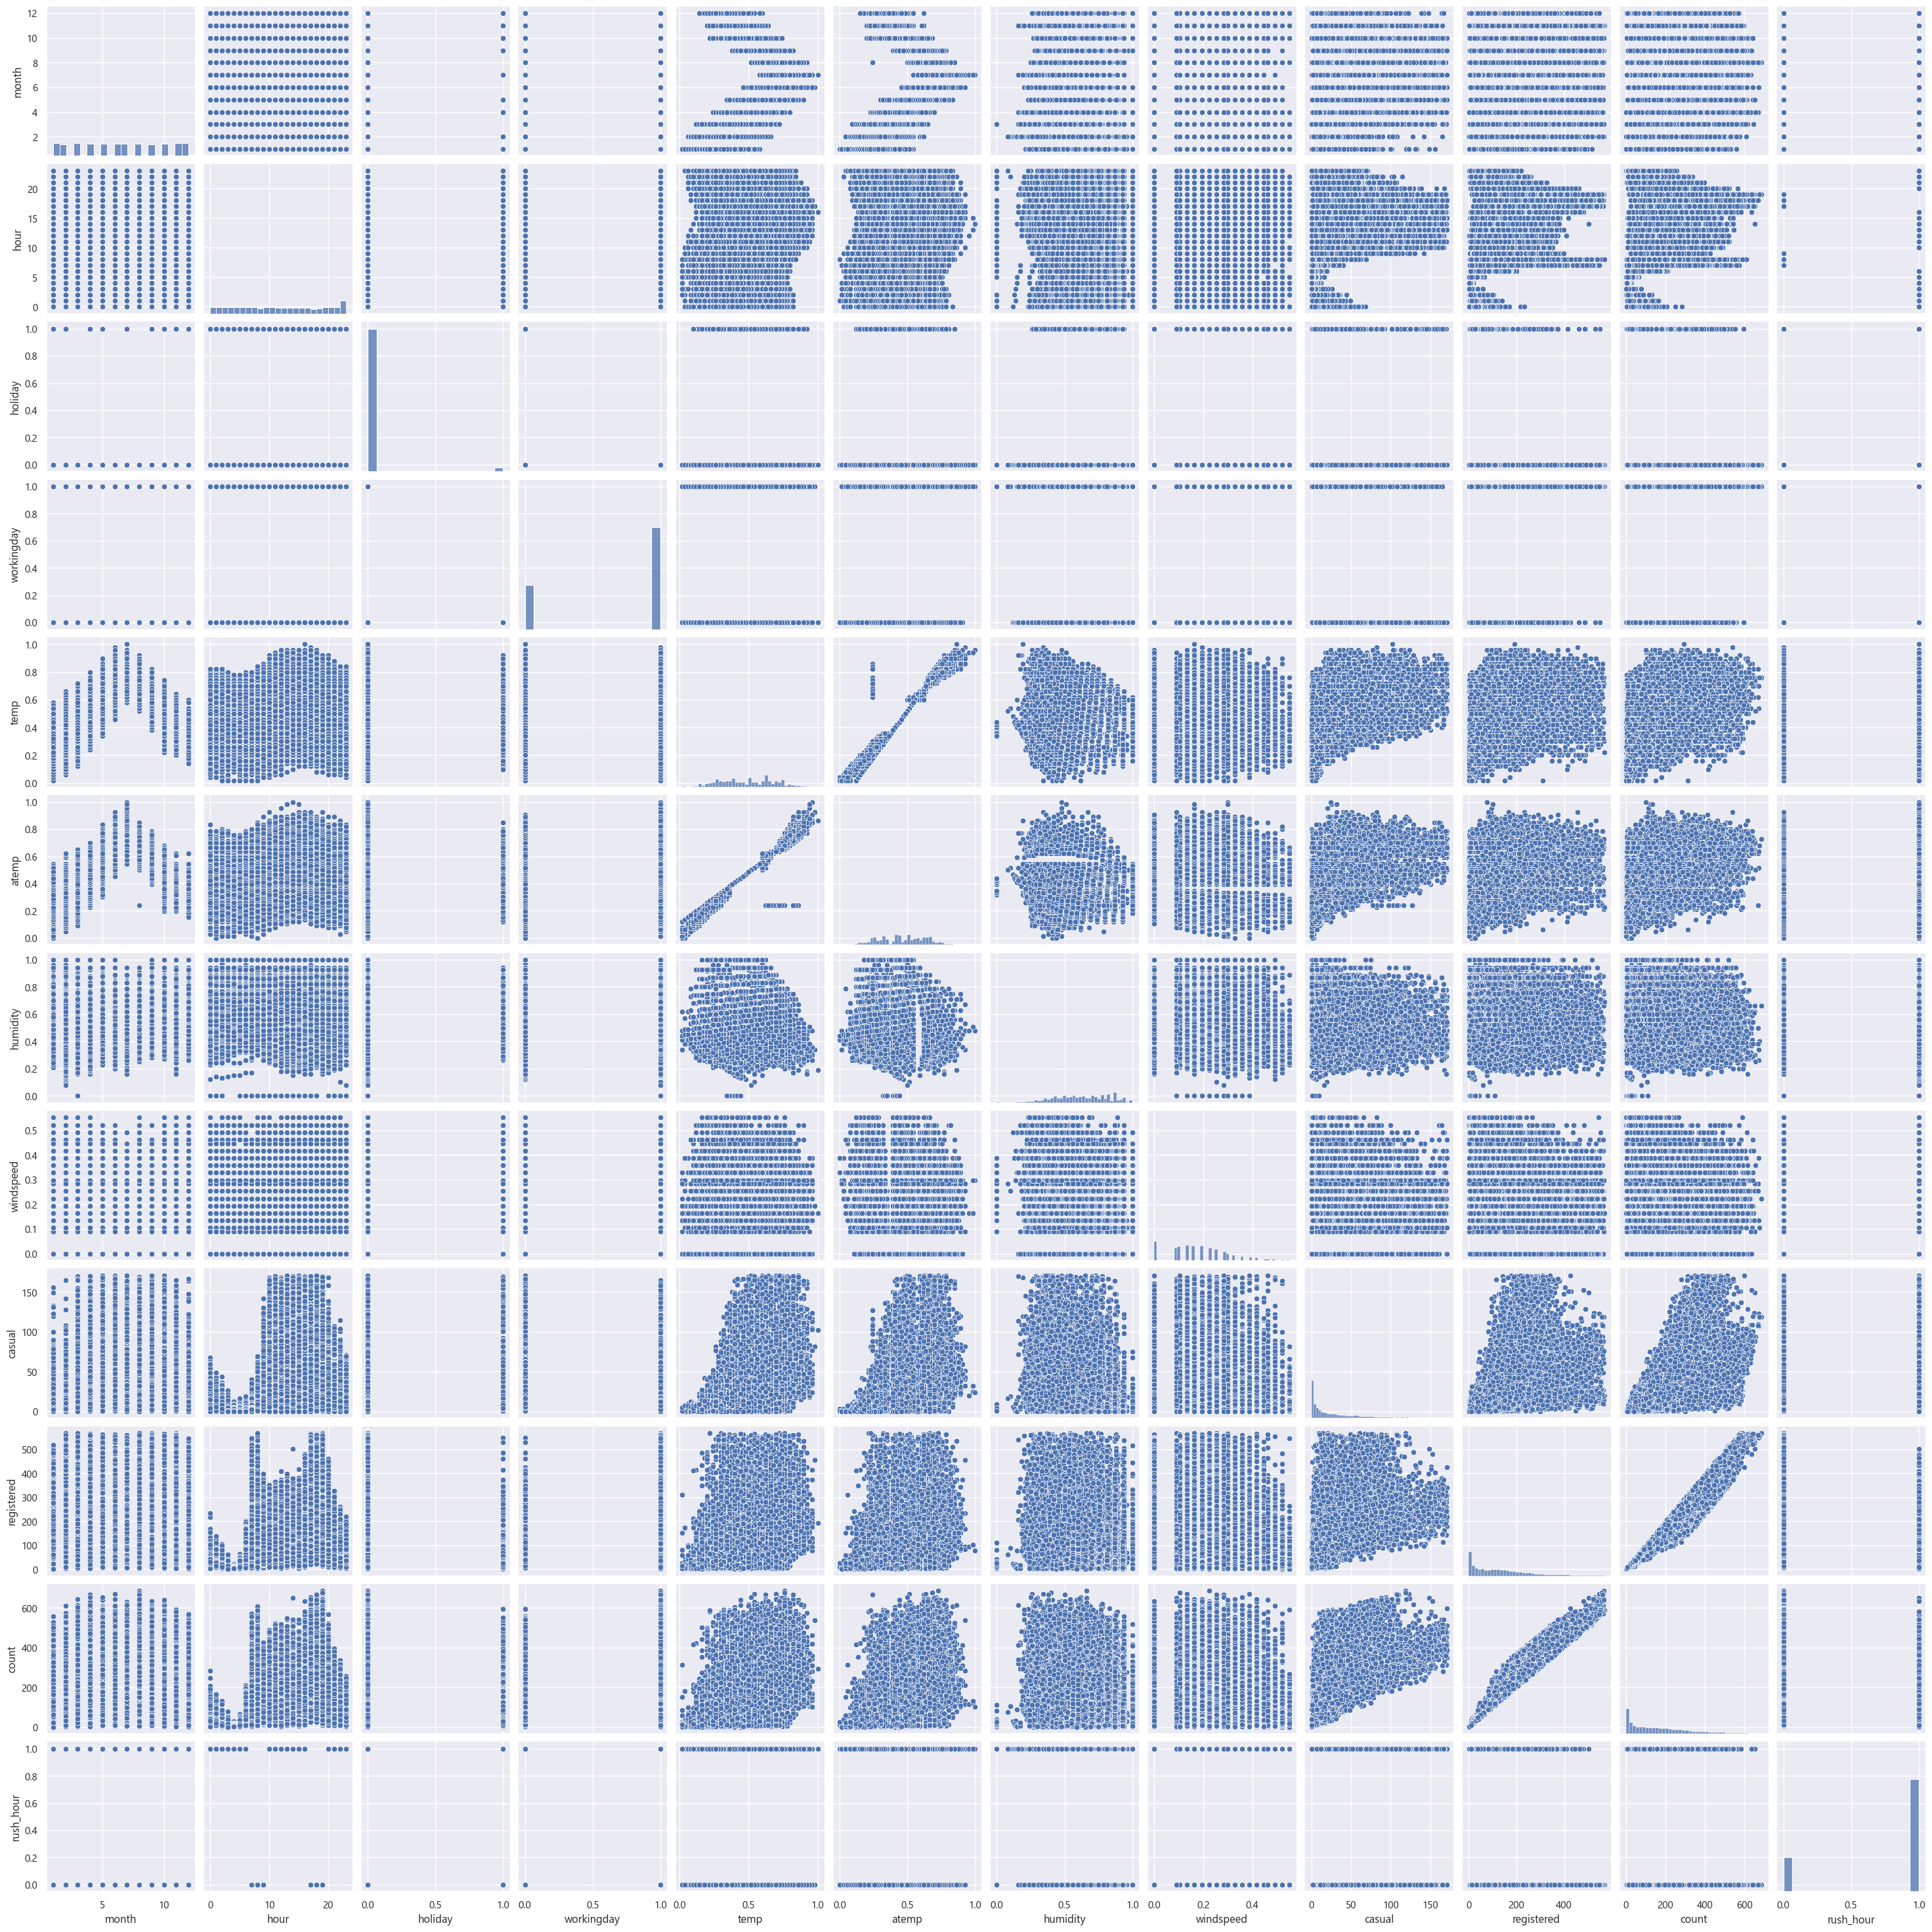

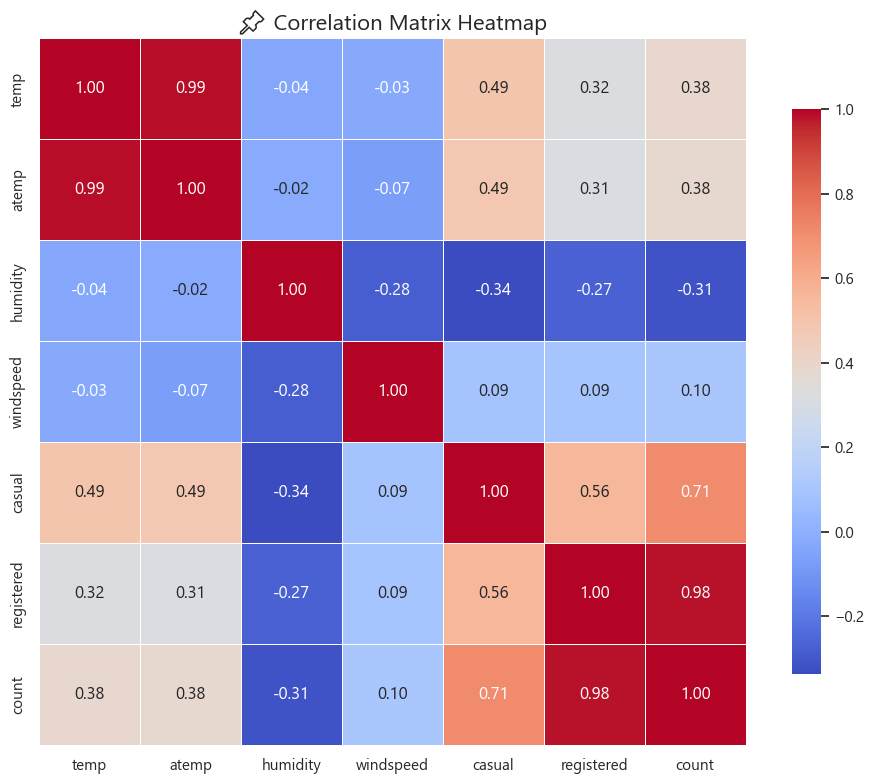

In [156]:
sns.pairplot(df)
plt.show()
corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("📌 Correlation Matrix Heatmap", fontsize=16)
plt.tight_layout()
plt.show()